# Question 2

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno

### 1. Load dataset

In [500]:
df = pd.read_csv('marketing.csv',index_col=0, delimiter=',')
df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0,4.0,Yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaN,Email,True,2.0,4.0,Yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaN,Email,True,2.0,4.0,Yes


In [501]:
df.shape

(10037, 15)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              10037 non-null  object 
 1   date_served          10021 non-null  object 
 2   marketing_channel    10022 non-null  object 
 3   variant              10037 non-null  object 
 4   converted            10037 non-null  bool   
 5   language_displayed   10037 non-null  object 
 6   language_preferred   10037 non-null  object 
 7   age_group            10037 non-null  object 
 8   date_subscribed      1856 non-null   object 
 9   date_canceled        577 non-null    object 
 10  subscribing_channel  1856 non-null   object 
 11  is_retained          10037 non-null  bool   
 12  DoW                  1856 non-null   float64
 13  channel_code         1856 non-null   float64
 14  is_correct_lang      10037 non-null  object 
dtypes: bool(2), float64(2), object(11)
m

### 2. Examining missing data

<AxesSubplot:>

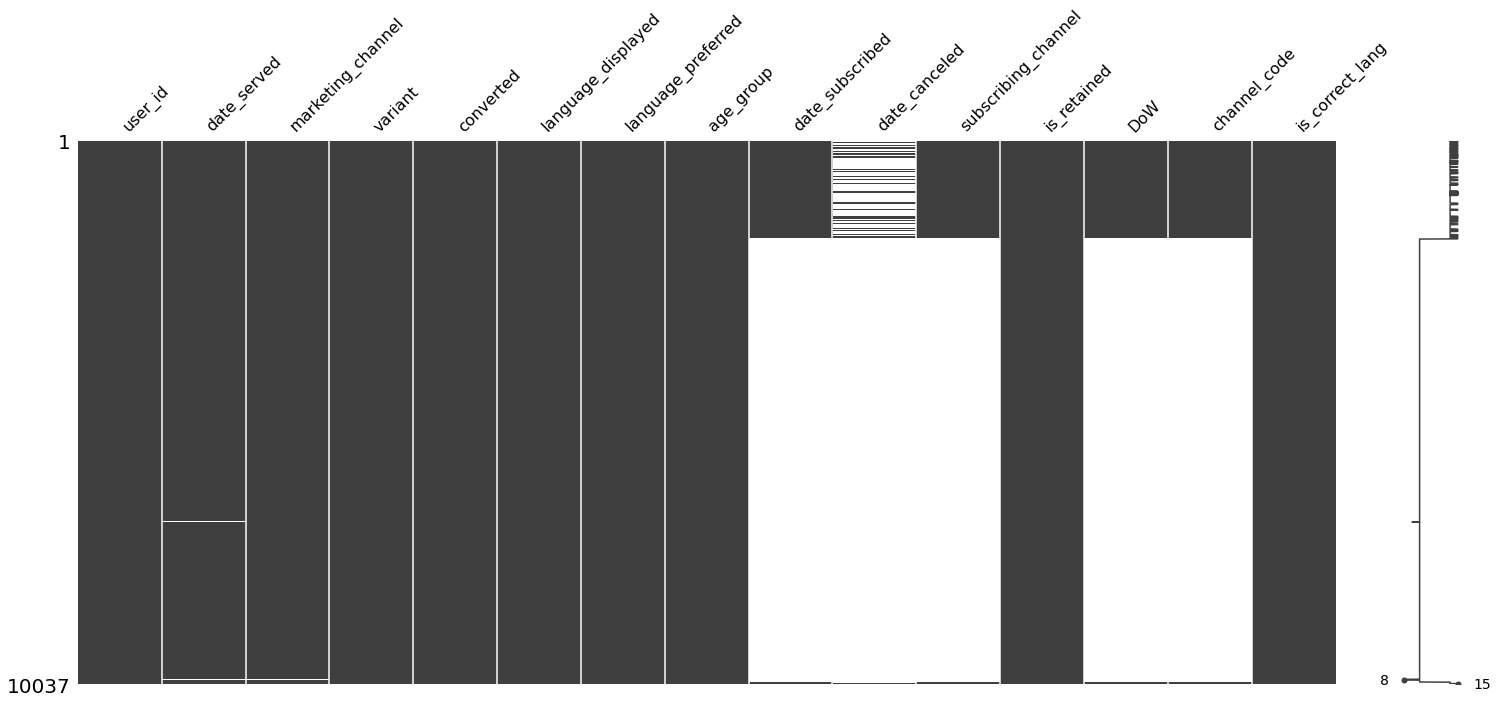

In [503]:
msno.matrix(df)

<AxesSubplot:>

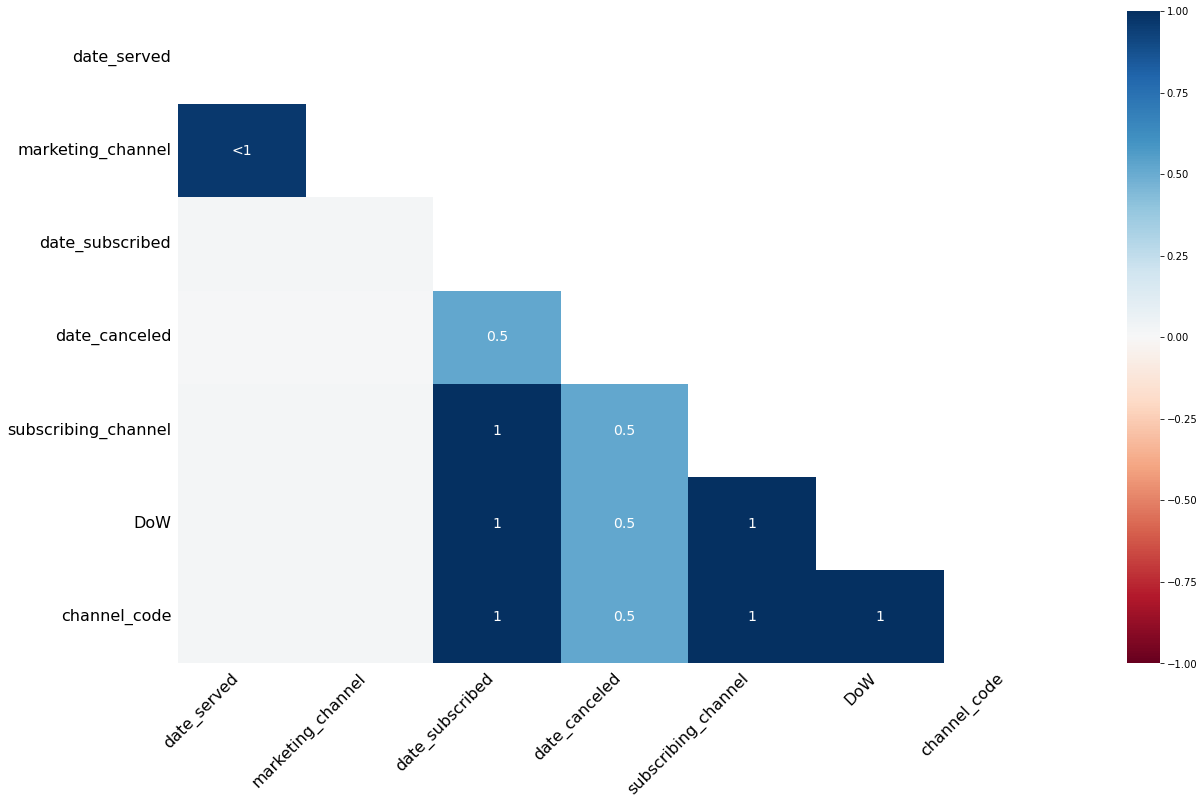

In [504]:
msno.heatmap(df)

In [505]:
# looking into the different features to understand why

df[df['date_canceled'].isna()]; # needs feature engineering
#df[df['date_served'].isna()] # drop this
#df[df['marketing_channel'].isna()] # drop this
#df[df['subscribing_channel'].isna()]
#df[df['date_subscribed'].isna()]; # those who didn't subscribe after viewing the ad
#df[df['DoW'].isna()];
#df[df['channel_code'].isna()];

There is a sizeable chunk of missing data from `date_subscribed`, `date_canceled`, `subscribing_channel`, `DOW`, `channel_code`. 

Additionally, if the strong correlation of missing data between `date_subscribed`, `subscribing_channel`, `DOW`, and `channel_code` indicated that if there is data missing in any of these columns, it is most likely missing in the other three columns too. Because... logically.

But I need to bear in mind that 

1. If there is no churn, there will obviously be missing data in `date_canceled`. So I need to do something about that.
2. If there is no subscription, there will obviously be missing data in `date_subscribed`. So I need to do something about that.
3. DoW, channel_code have 0.0 as a legitimate code

### 3. Feature engineering

In [506]:
df['date_served']= pd.to_datetime(df['date_served'])
df['date_subscribed']= pd.to_datetime(df['date_subscribed'])
df['date_canceled']= pd.to_datetime(df['date_canceled'])

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  DoW                  1856 non-null   float64       
 13  channel_code         1856 non-n

In [508]:
# feature counting days from ad serve to subscription
df['served_to_subscribed'] = df['date_subscribed'] - df['date_served']
# feature counting days from subscription date to cancellation date
df['subscribed_to_canceled'] = df['date_canceled'] - df['date_subscribed']

# drop all rows that have negative timedeltas because logically, it doesn't make sense and doesn't help with analysis now
neg_d_index = df[df['served_to_subscribed'] < pd.Timedelta(0)].index
neg_d_index2 = df[df['subscribed_to_canceled'] < pd.Timedelta(0)].index
df.drop(neg_d_index, inplace=True)
df.drop(neg_d_index2, inplace=True)

df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9856 entries, 0 to 10036
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   user_id                 9856 non-null   object         
 1   date_served             9840 non-null   datetime64[ns] 
 2   marketing_channel       9841 non-null   object         
 3   variant                 9856 non-null   object         
 4   converted               9856 non-null   bool           
 5   language_displayed      9856 non-null   object         
 6   language_preferred      9856 non-null   object         
 7   age_group               9856 non-null   object         
 8   date_subscribed         1675 non-null   datetime64[ns] 
 9   date_canceled           534 non-null    datetime64[ns] 
 10  subscribing_channel     1675 non-null   object         
 11  is_retained             9856 non-null   bool           
 12  DoW                     1675 non-

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang,served_to_subscribed,subscribed_to_canceled
4638,a100002795,2018-01-21,House Ads,control,False,English,English,30-36 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
4621,a100002778,2018-01-19,Instagram,control,False,English,English,36-45 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
5478,a100003614,2018-01-29,House Ads,control,False,English,Arabic,36-45 years,NaT,NaT,NaN,True,NaN,NaN,No,NaT,NaT
4499,a100002656,2018-01-01,Facebook,control,False,English,English,45-55 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
6522,a100004246,2018-01-08,Facebook,personalization,False,English,English,24-30 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
7438,a100004704,2018-01-11,House Ads,personalization,False,English,English,45-55 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
7753,a100004967,2018-01-29,House Ads,personalization,False,English,English,24-30 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
4894,a100003051,2018-01-27,Instagram,control,False,English,English,24-30 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
4755,a100002912,2018-01-07,House Ads,control,False,English,English,55+ years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT
5895,a100005933,2018-01-15,Email,control,False,English,English,19-24 years,NaT,NaT,NaN,True,NaN,NaN,Yes,NaT,NaT


In [509]:
# drop the ones i've identified for dropping
df.dropna(subset=['date_served', 'marketing_channel'], inplace=True)

In [510]:
df.isna().sum()

user_id                      0
date_served                  0
marketing_channel            0
variant                      0
converted                    0
language_displayed           0
language_preferred           0
age_group                    0
date_subscribed           8165
date_canceled             9306
subscribing_channel       8165
is_retained                  0
DoW                       8165
channel_code              8165
is_correct_lang              0
served_to_subscribed      8165
subscribed_to_canceled    9306
dtype: int64

In [511]:
# remap `is_correct_lang` to bool
df['is_correct_lang'] = df['is_correct_lang'].map( {'Yes':1, 'No':0} )
df.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang,served_to_subscribed,subscribed_to_canceled
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0,1.0,1,0 days,NaT
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0,1.0,1,0 days,NaT
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0,1.0,1,0 days,NaT


In [512]:
df['day_served'] = df['date_served'].dt.day_name()
df['dow_served'] = df['date_served'].dt.day_of_week
df['month_served'] = df['date_served'].dt.month
df.sample(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang,served_to_subscribed,subscribed_to_canceled,day_served,dow_served,month_served
729,a100000831,2018-01-23,Instagram,personalization,True,English,English,0-18 years,2018-01-23,2018-04-17,Instagram,False,1.0,2.0,1,0 days,84 days,Tuesday,1,1
9452,a100006749,2018-01-28,House Ads,personalization,False,English,English,55+ years,NaT,NaT,NaN,True,NaN,NaN,1,NaT,NaT,Sunday,6,1
1269,a100001091,2018-01-13,Push,personalization,True,English,English,19-24 years,2018-01-13,2018-01-13,Push,False,5.0,5.0,1,0 days,0 days,Saturday,5,1


In [513]:
df['day_subscribed'] = df['date_subscribed'].dt.day_name()
#df['dow_subscribed'] = df['date_subscribed'].dt.day_of_week
df['month_subscribed'] = df['date_subscribed'].dt.month
df.sample(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,DoW,channel_code,is_correct_lang,served_to_subscribed,subscribed_to_canceled,day_served,dow_served,month_served,day_subscribed,month_subscribed
339,a100000496,2018-01-14,House Ads,personalization,True,English,English,36-45 years,2018-01-14,NaT,...,6.0,1.0,1,0 days,NaT,Sunday,6,1,Sunday,1.0
8667,a100005830,2018-01-19,Facebook,personalization,False,English,English,36-45 years,NaT,NaT,...,NaN,NaN,1,NaT,NaT,Friday,4,1,NaN,NaN
3941,a100002278,2018-01-24,Facebook,control,False,English,English,30-36 years,NaT,NaT,...,NaN,NaN,1,NaT,NaT,Wednesday,2,1,NaN,NaN


In [514]:
df['day_canceled'] = df['date_canceled'].dt.day_name()
df['dow_canceled'] = df['date_canceled'].dt.day_of_week
df['month_canceled'] = df['date_canceled'].dt.month
df.sample(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,served_to_subscribed,subscribed_to_canceled,day_served,dow_served,month_served,day_subscribed,month_subscribed,day_canceled,dow_canceled,month_canceled
6994,a100004482,2018-01-03,House Ads,personalization,False,English,English,0-18 years,NaT,NaT,...,NaT,NaT,Wednesday,2,1,NaN,NaN,NaN,NaN,NaN
8949,a100006246,2018-01-02,Facebook,personalization,False,English,English,0-18 years,NaT,NaT,...,NaT,NaT,Tuesday,1,1,NaN,NaN,NaN,NaN,NaN
4517,a100002674,2018-01-04,Facebook,control,False,English,English,45-55 years,NaT,NaT,...,NaT,NaT,Thursday,3,1,NaN,NaN,NaN,NaN,NaN


In [515]:
# try converting categorical to numerical for exploration purposes
df['variant_code'] = df['variant'].map( {'personalization':1, 'control':0} )
df['mc_code'] = df['marketing_channel'].map( {'Email':1, 'Facebook':2, 'House Ads':3, 'Instagram':4, 'Push':0} )
df['ld_code'] = df['language_displayed'].map( {'Arabic':1, 'English':2, 'German':3, 'Spanish':0} )
df['lp_code'] = df['language_preferred'].map( {'Arabic':1, 'English':2, 'German':3, 'Spanish':0} )
df.sample(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,month_served,day_subscribed,month_subscribed,day_canceled,dow_canceled,month_canceled,variant_code,mc_code,ld_code,lp_code
8129,a100005343,2018-01-01,House Ads,personalization,False,English,English,0-18 years,NaT,NaT,...,1,NaN,NaN,NaN,NaN,NaN,1,3,2,2
6693,a100004332,2018-01-10,Instagram,personalization,False,English,English,36-45 years,NaT,NaT,...,1,NaN,NaN,NaN,NaN,NaN,1,4,2,2
3419,a100002025,2018-01-04,House Ads,control,False,English,English,24-30 years,NaT,NaT,...,1,NaN,NaN,NaN,NaN,NaN,0,3,2,2


In [516]:
# find out if language matches
df['lang_match'] = np.where(df['ld_code'] == df['lp_code'], True, False)

In [517]:
# create feature on retention rate
df['retention_rct'] = df['is_retained']/df.groupby('age_group')['converted'].transform(sum) * 100

### 4a. Explore correlation with numerical variable

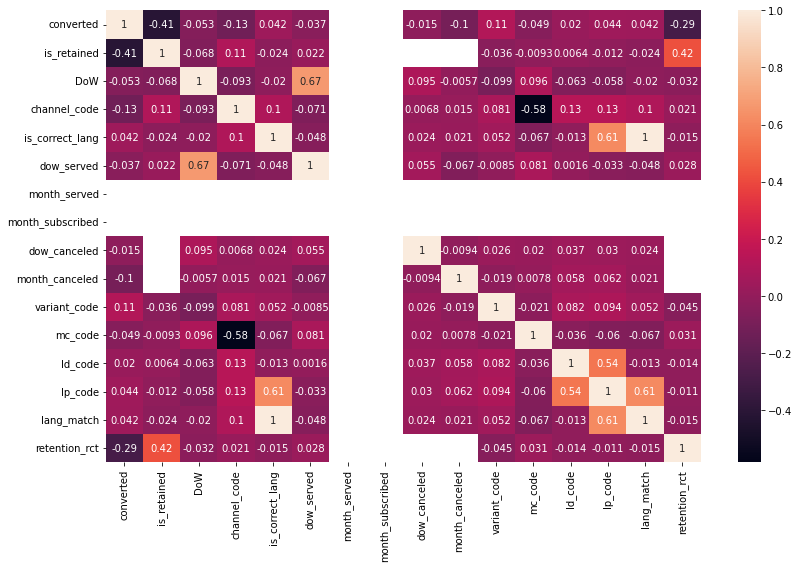

In [518]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

Right off the bat, personalisation does influence ad conversion for audiences who ended up subscribing.

There is a definite correlation between conversion and retention.
There is also a slight correlation between the subscribing channels and the retention of customers.

Looking at correlations we can divide the data up into subgroups (within subgroups):
1. Subscribed
2. Cancelled

And then comparing between variant groups. Perhaps, we can look into it further when comparing against categorical data

In [519]:
subscribed_df = df[~df['date_subscribed'].isna()]
subscribed_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,month_subscribed,day_canceled,dow_canceled,month_canceled,variant_code,mc_code,ld_code,lp_code,lang_match,retention_rct
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,0.505051
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,0.321543
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,0.425532
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,1.265823
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,1.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,...,1.0,Wednesday,2.0,1.0,0,1,3,3,True,0.000000
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,...,1.0,NaN,NaN,NaN,0,1,3,3,True,1.250000
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,...,1.0,NaN,NaN,NaN,0,4,3,3,True,1.250000
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,...,1.0,NaN,NaN,NaN,0,1,3,3,True,0.505051


In [520]:
cancelled_df = subscribed_df[~subscribed_df['date_canceled'].isna()]
cancelled_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,month_subscribed,day_canceled,dow_canceled,month_canceled,variant_code,mc_code,ld_code,lp_code,lang_match,retention_rct
11,a100000040,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,2018-01-18,...,1.0,Thursday,3.0,1.0,1,3,2,2,True,0.0
12,a100000041,2018-01-01,House Ads,personalization,True,Arabic,Arabic,24-30 years,2018-01-01,2018-02-22,...,1.0,Thursday,3.0,2.0,1,3,1,1,True,0.0
13,a100000042,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,2018-03-09,...,1.0,Friday,4.0,3.0,1,3,2,2,True,0.0
14,a100000043,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,2018-02-18,...,1.0,Sunday,6.0,2.0,1,3,2,2,True,0.0
15,a100000044,2018-01-01,House Ads,personalization,True,Arabic,Arabic,24-30 years,2018-01-01,2018-03-03,...,1.0,Saturday,5.0,3.0,1,3,1,1,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10028,a100007286,2018-01-17,Email,control,True,German,German,19-24 years,2018-01-17,2018-03-05,...,1.0,Monday,0.0,3.0,0,1,3,3,True,0.0
10029,a100007287,2018-01-17,Email,control,True,German,German,24-30 years,2018-01-17,2018-02-14,...,1.0,Wednesday,2.0,2.0,0,1,3,3,True,0.0
10030,a100007288,2018-01-17,Email,control,True,German,German,30-36 years,2018-01-17,2018-04-26,...,1.0,Thursday,3.0,4.0,0,1,3,3,True,0.0
10031,a100007289,2018-01-17,Email,control,True,German,German,36-45 years,2018-01-17,2018-01-27,...,1.0,Saturday,5.0,1.0,0,1,3,3,True,0.0


### 4b. Exploring relationships with categorical variables

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 10036
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   user_id                 9840 non-null   object         
 1   date_served             9840 non-null   datetime64[ns] 
 2   marketing_channel       9840 non-null   object         
 3   variant                 9840 non-null   object         
 4   converted               9840 non-null   bool           
 5   language_displayed      9840 non-null   object         
 6   language_preferred      9840 non-null   object         
 7   age_group               9840 non-null   object         
 8   date_subscribed         1675 non-null   datetime64[ns] 
 9   date_canceled           534 non-null    datetime64[ns] 
 10  subscribing_channel     1675 non-null   object         
 11  is_retained             9840 non-null   bool           
 12  DoW                     1675 non-

### Q. Which age group sees highest conversions?

<AxesSubplot:xlabel='age_group'>

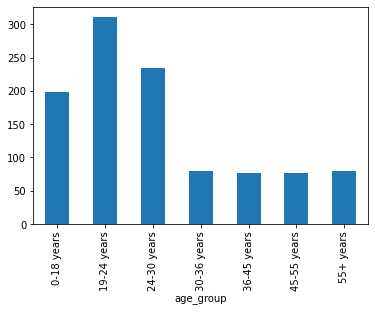

In [522]:
df.groupby('age_group')['converted'].sum().plot.bar()

In this case, we can see that the 19-24 years age group sees the highest conversions, followed by the 24-30 years and 0-18 years age groups respectively.

We could also look into the retention rate amongst the age groups too.

### Q. Which age group sees the highest average retention rate?

<AxesSubplot:xlabel='age_group'>

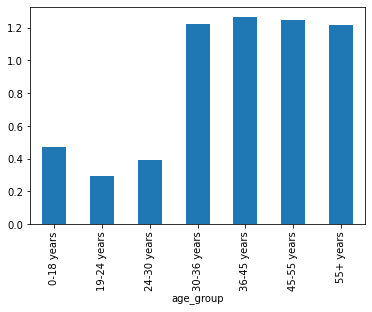

In [523]:
df.groupby('age_group')['retention_rct'].mean().plot.bar()

However, there is higher retention rate amongst the other age groups. But what are they in terms of absolute numbers?

<AxesSubplot:xlabel='age_group'>

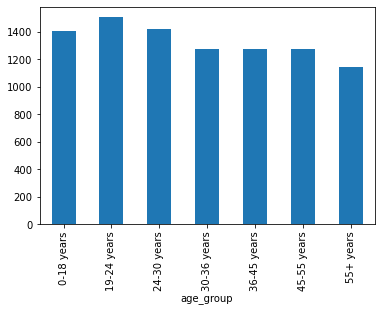

In [524]:
df.groupby('age_group')['is_retained'].sum().plot.bar()

There is still a higher retention amongst the three groups although marginally.

#### Perhaps we could look into how to better retain those from the younger age groups.

### Q. Does personalisation have an effect on conversions and retention rates?

<AxesSubplot:xlabel='variant,age_group'>

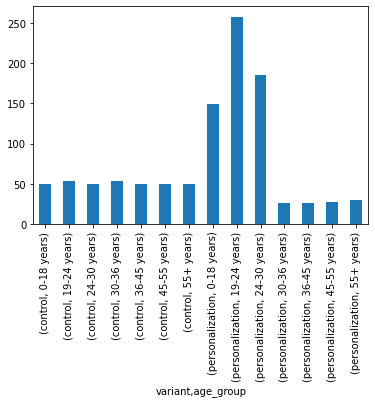

In [525]:
df.groupby(['variant','age_group'])['converted'].sum().plot.bar()

<AxesSubplot:xlabel='variant,age_group'>

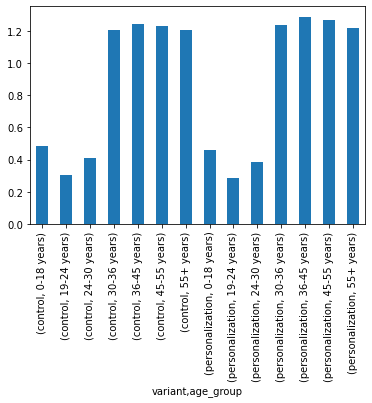

In [526]:
df.groupby(['variant','age_group'])['retention_rct'].mean().plot.bar()

While personalisation does see a significant impact on conversions, it does not affect the retention on subscribers.

### Q. Are certain demographics more quick to subscribe?

In [527]:
df.groupby('age_group')['served_to_subscribed'].mean()

age_group
0-18 years    2 days 04:07:56.821192052
19-24 years   1 days 20:09:43.783783783
24-30 years   1 days 23:48:05.950413223
30-36 years   2 days 12:53:52.653061224
36-45 years   2 days 13:44:16.551724137
45-55 years   3 days 00:38:08.741721854
55+ years     2 days 16:46:49.756097560
Name: served_to_subscribed, dtype: timedelta64[ns]

The 19-24 years age group is the quickest to subscribe after the ads are served to them but...

### Q. Does it have to do with the type of marketing channels?

In [528]:
df.groupby(['age_group', 'marketing_channel'])['served_to_subscribed'].mean()

age_group    marketing_channel
0-18 years   Email                         0 days 00:00:00
             Facebook            1 days 07:21:17.419354838
             House Ads           3 days 08:44:44.745762711
             Instagram           1 days 15:23:46.415094339
             Push                          3 days 00:48:00
19-24 years  Email               0 days 01:41:03.157894736
             Facebook            1 days 05:03:09.473684210
             House Ads           3 days 23:22:21.176470588
             Instagram           0 days 17:21:25.714285714
             Push                          0 days 08:00:00
24-30 years  Email               0 days 01:27:16.363636363
             Facebook            1 days 00:44:18.461538461
             House Ads           3 days 17:46:15.572519084
             Instagram           1 days 14:19:42.089552238
             Push                1 days 14:49:24.705882352
30-36 years  Email                         0 days 00:00:00
             Facebook    

This is in line with social media habits across age groups with the older groups more likely to be exposed to Facebook and the younger groups to Instagram.

It is also highly likely that 19-24 years age groups are more likely to subscribe after ads are sent to them as they spend time online.

#### However, across the board, Email ads do not work.

### Q. But do they subscribe on the same channel they were served the ads on?

In [529]:
df.groupby('marketing_channel')['subscribing_channel'].value_counts()

marketing_channel  subscribing_channel
Email              Email                  200
Facebook           Facebook               263
                   Instagram               36
                   Email                   12
                   Push                     6
                   House Ads                5
House Ads          House Ads              336
                   Instagram              159
                   Facebook                91
                   Push                    53
                   Email                   52
Instagram          Instagram              294
                   Facebook                24
                   Email                    9
                   House Ads                6
                   Push                     3
Push               Push                    86
                   Instagram               17
                   Facebook                14
                   House Ads                7
                   Email                 

Mostly yes.

In [530]:
df[df['age_group'] == '0-18 years'].groupby('marketing_channel')['subscribing_channel'].value_counts()

marketing_channel  subscribing_channel
Email              Email                  39
Facebook           Facebook               49
                   Email                   7
                   Instagram               5
                   Push                    1
House Ads          House Ads              65
                   Instagram              20
                   Facebook               18
                   Push                   10
                   Email                   5
Instagram          Instagram              47
                   House Ads               3
                   Facebook                2
                   Email                   1
Push               Push                   16
                   Instagram               9
                   House Ads               4
                   Facebook                1
Name: subscribing_channel, dtype: int64

In [531]:
df[df['age_group'] == '19-24 years'].groupby('marketing_channel')['subscribing_channel'].value_counts()

marketing_channel  subscribing_channel
Email              Email                   57
Facebook           Facebook                88
                   House Ads                5
                   Email                    1
                   Instagram                1
House Ads          House Ads               65
                   Instagram               33
                   Facebook                29
                   Push                    15
                   Email                   11
Instagram          Instagram              104
                   Facebook                 7
                   Push                     1
Push               Push                    25
                   Email                    1
                   Instagram                1
Name: subscribing_channel, dtype: int64

In [532]:
df[df['age_group'] == '24-30 years'].groupby('marketing_channel')['subscribing_channel'].value_counts()

marketing_channel  subscribing_channel
Email              Email                  66
Facebook           Facebook               53
                   Instagram               9
                   Email                   2
                   Push                    1
House Ads          House Ads              68
                   Instagram              35
                   Facebook               13
                   Push                    9
                   Email                   6
Instagram          Instagram              63
                   House Ads               3
                   Facebook                1
Push               Push                   22
                   Instagram               6
                   Facebook                5
                   House Ads               1
Name: subscribing_channel, dtype: int64

In [533]:
df[df['age_group'] == '36-45 years'].groupby('marketing_channel')['subscribing_channel'].value_counts();

In [534]:
df[df['age_group'] == '45-55 years'].groupby('marketing_channel')['subscribing_channel'].value_counts();

In [535]:
df[df['age_group'] == '55+ years'].groupby('marketing_channel')['subscribing_channel'].value_counts();

### Q. So, how quick do they cancel?

In [536]:
df.groupby('age_group')['subscribed_to_canceled'].mean()

age_group
0-18 years    43 days 10:31:50.204081632
19-24 years   52 days 05:26:48.510638298
24-30 years   45 days 23:22:06.315789473
30-36 years   53 days 19:54:53.617021277
36-45 years             54 days 12:57:36
45-55 years   46 days 22:07:03.529411764
55+ years     55 days 02:10:54.545454545
Name: subscribed_to_canceled, dtype: timedelta64[ns]

So across age groups, those who canceled take an average of 49 days before cancelling their subscription.

### Q. Does it have anything to do with the channels they subscribe on?

In [537]:
df.groupby(['age_group', 'subscribing_channel'])['subscribed_to_canceled'].mean();
df.groupby('subscribing_channel')['subscribed_to_canceled'].mean()

subscribing_channel
Email                 47 days 21:00:00
Facebook    49 days 23:47:15.398230088
House Ads   46 days 19:41:32.307692307
Instagram   52 days 18:45:17.880794702
Push                  46 days 16:00:00
Name: subscribed_to_canceled, dtype: timedelta64[ns]

Not quite.

### Q. Does seasonality affect conversions across age groups?

In [538]:
# day of week subscription
df.groupby('age_group')[['DoW','converted']].corr().unstack().iloc[:,1]

age_group
0-18 years    -0.032091
19-24 years   -0.066832
24-30 years   -0.085947
30-36 years   -0.021034
36-45 years    0.003937
45-55 years   -0.097096
55+ years      0.094393
Name: (DoW, converted), dtype: float64

In [539]:
# day of week ad served
df.groupby('age_group')[['dow_served','converted']].corr().unstack().iloc[:,1]

age_group
0-18 years    -0.051550
19-24 years   -0.022856
24-30 years   -0.048456
30-36 years   -0.025887
36-45 years   -0.010314
45-55 years   -0.024614
55+ years     -0.052193
Name: (dow_served, converted), dtype: float64

There's no strong correlation to suggest that.

### Q. How about across marketing channels?

In [540]:
# across marketing channels
df.groupby('age_group')[['marketing_channel','converted']].corr().unstack()

,converted
,converted
age_group,
0-18 years,1.0
19-24 years,1.0
24-30 years,1.0
30-36 years,1.0
36-45 years,1.0
45-55 years,1.0
55+ years,1.0


<AxesSubplot:xlabel='marketing_channel,age_group'>

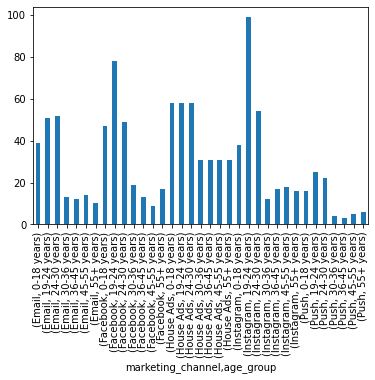

In [541]:
df.groupby(['marketing_channel','age_group'])['converted'].sum().plot.bar()

Marketing ads on Instagram (followed by Facebook) has the highest impact on conversions in the younger age groups.

<AxesSubplot:xlabel='marketing_channel,age_group'>

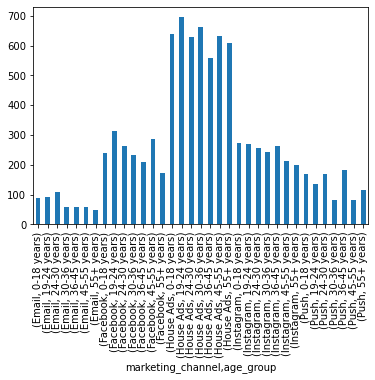

In [542]:
df.groupby(['marketing_channel','age_group'])['is_retained'].sum().plot.bar()

But the absolute retention numbers on house ads are higher than Facebook and Instagram. 

Let's look into that even more.

### Q. Which marketing channel sees highest conversions?

<AxesSubplot:xlabel='marketing_channel'>

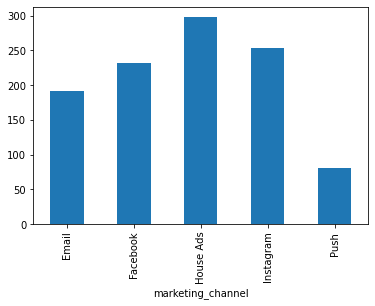

In [543]:
df.groupby('marketing_channel')['converted'].sum().plot.bar()

<AxesSubplot:xlabel='marketing_channel'>

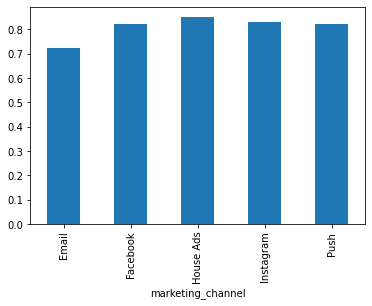

In [544]:
df.groupby('marketing_channel')['retention_rct'].mean().plot.bar()

<AxesSubplot:xlabel='subscribing_channel'>

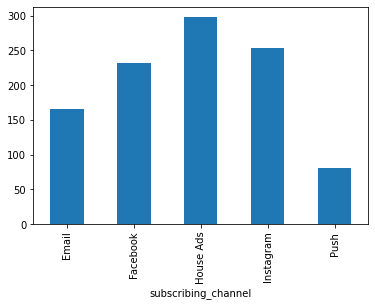

In [545]:
# check on channels subscribed on
df.groupby('subscribing_channel')['converted'].sum().plot.bar()

<AxesSubplot:xlabel='subscribing_channel'>

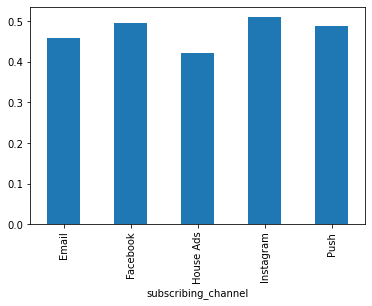

In [546]:
# check on channels subscribed on
df.groupby('subscribing_channel')['retention_rct'].mean().plot.bar()

House Ads, Instagram and Facebook see higher numbers of conversions, with the retention rates relatively similar.

### Q. Does personalisation have an impact on conversion?

<AxesSubplot:xlabel='variant,marketing_channel'>

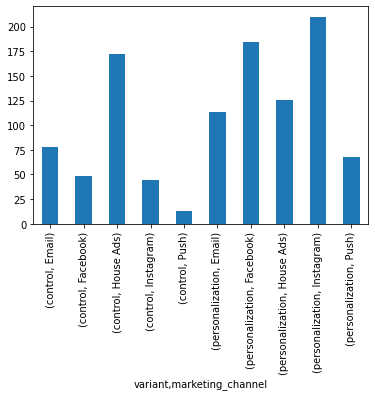

In [547]:
df.groupby(['variant','marketing_channel'])['converted'].sum().plot.bar()

As we have seen earlier, yes it does!

In [548]:
df.groupby(['marketing_channel', 'variant'])['converted'].sum()

marketing_channel  variant        
Email              control             78
                   personalization    113
Facebook           control             48
                   personalization    184
House Ads          control            172
                   personalization    126
Instagram          control             44
                   personalization    210
Push               control             13
                   personalization     68
Name: converted, dtype: int64

<AxesSubplot:xlabel='marketing_channel,variant'>

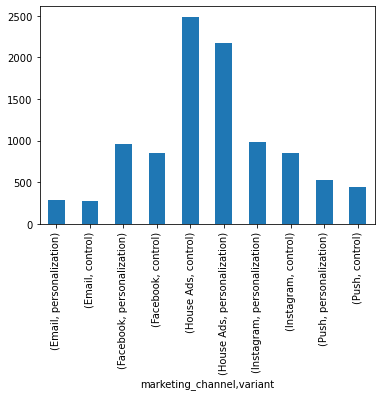

In [549]:
df.groupby(['marketing_channel'])['variant'].value_counts().plot.bar()

It is really likely that the lack of personalisation affected lower conversion rates on certain channels too

### Q. Which day of week of ad serve sees highest conversions?

<AxesSubplot:xlabel='dow_served'>

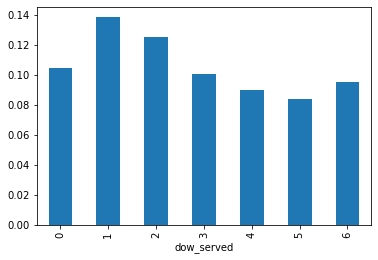

In [563]:
df.groupby('dow_served')['converted'].mean().plot.bar()

### Q. Which day of week saw highest conversions?

<AxesSubplot:xlabel='DoW'>

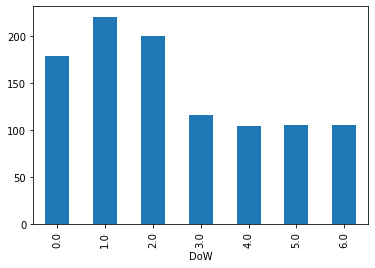

In [586]:
df.groupby('DoW')['converted'].sum().plot.bar()

### Q. Which day of week saw highest cancellations?

<AxesSubplot:xlabel='dow_canceled'>

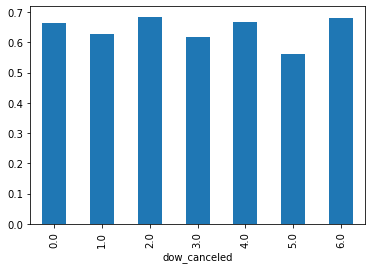

In [564]:
df.groupby('dow_canceled')['converted'].mean().plot.bar()

#### Interestingly, the start of the week saw an increasing trend in subscription . Perhaps, we could match it with daily activities according to the age groups.

In [565]:
df.groupby(['age_group', 'DoW'])['converted'].mean()

age_group    DoW
0-18 years   0.0    0.777778
             1.0    0.600000
             2.0    0.636364
             3.0    0.640000
             4.0    0.484848
             5.0    0.675676
             6.0    0.703704
19-24 years  0.0    0.815385
             1.0    0.705128
             2.0    0.633333
             3.0    0.666667
             4.0    0.729167
             5.0    0.571429
             6.0    0.709091
24-30 years  0.0    0.697368
             1.0    0.701299
             2.0    0.627119
             3.0    0.591837
             4.0    0.615385
             5.0    0.666667
             6.0    0.545455
30-36 years  0.0    0.350000
             1.0    0.571429
             2.0    0.615385
             3.0    0.300000
             4.0    0.409091
             5.0    0.578947
             6.0    0.400000
36-45 years  0.0    0.411765
             1.0    0.481481
             2.0    0.595238
             3.0    0.333333
             4.0    0.333333
             5.0    0.4347

The pattern seems to resonate more firmly amongst the younger age groups. Perhaps, it is after a discussion on weekend discoveries ?

In [566]:
df.groupby(['age_group', 'dow_canceled'])['converted'].mean()

age_group    dow_canceled
0-18 years   0.0             0.769231
             1.0             0.600000
             2.0             0.769231
             3.0             0.500000
             4.0             0.750000
             5.0             0.562500
             6.0             0.833333
19-24 years  0.0             0.578947
             1.0             0.727273
             2.0             0.625000
             3.0             0.666667
             4.0             0.611111
             5.0             0.642857
             6.0             0.741935
24-30 years  0.0             0.600000
             1.0             0.769231
             2.0             0.733333
             3.0             0.666667
             4.0             0.800000
             5.0             0.600000
             6.0             0.666667
30-36 years  0.0             0.500000
             1.0             0.285714
             2.0             0.600000
             3.0             0.714286
             4.0        

There is not much of a pattern for cancellations. Perhaps, this is something that can be assessed with feedback surveys?

### Q. Does language match influence conversion and cancelation?

<AxesSubplot:xlabel='lang_match'>

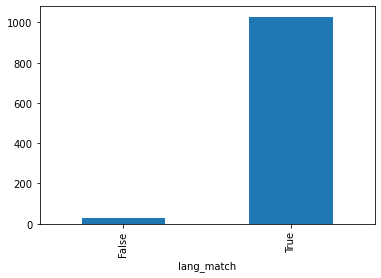

In [555]:
df.groupby('lang_match')['converted'].sum().plot.bar()

<AxesSubplot:xlabel='lang_match'>

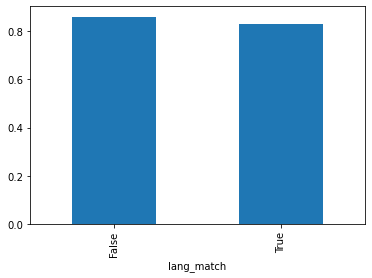

In [561]:
df.groupby('lang_match')['retention_rct'].mean().plot.bar()

In [557]:
# across age_groups
df.groupby('age_group')[['lang_match','converted']].corr().unstack().iloc[:,1]

age_group
0-18 years     0.039712
19-24 years    0.061613
24-30 years    0.059819
30-36 years    0.035892
36-45 years    0.011765
45-55 years    0.015490
55+ years      0.034870
Name: (lang_match, converted), dtype: float64

In [558]:
# across age_groups
df.groupby('age_group')[['lang_match','is_retained']].corr().unstack().iloc[:,1]

age_group
0-18 years    -0.014559
19-24 years   -0.036184
24-30 years   -0.033468
30-36 years   -0.030627
36-45 years    0.009240
45-55 years   -0.012250
55+ years     -0.040655
Name: (lang_match, is_retained), dtype: float64

In [559]:
# across subscribing_channel
df.groupby('subscribing_channel')[['lang_match','converted']].corr().unstack().iloc[:,1]

subscribing_channel
Email        0.128624
Facebook     0.105747
House Ads   -0.122049
Instagram    0.044676
Push         0.158155
Name: (lang_match, converted), dtype: float64

In [560]:
# across subscribing_channel
df.groupby('subscribing_channel')[['lang_match','is_retained']].corr().unstack().iloc[:,1]

subscribing_channel
Email       -0.062545
Facebook     0.008738
House Ads    0.033641
Instagram    0.068231
Push         0.015809
Name: (lang_match, is_retained), dtype: float64

### Q. Does the language displayed have an influence on conversion?

In [567]:
# across age_groups
df.groupby('age_group')[['ld_code','converted']].corr().unstack().iloc[:,1]

age_group
0-18 years     0.018534
19-24 years    0.072152
24-30 years    0.089202
30-36 years   -0.062532
36-45 years    0.024730
45-55 years   -0.040603
55+ years     -0.101879
Name: (ld_code, converted), dtype: float64

In [568]:
# across age_groups
df.groupby('age_group')[['lp_code','converted']].corr().unstack().iloc[:,1]

age_group
0-18 years     0.048059
19-24 years    0.086306
24-30 years    0.095063
30-36 years    0.008736
36-45 years    0.008246
45-55 years    0.000697
55+ years     -0.040114
Name: (lp_code, converted), dtype: float64

Not much of a strong relationship.

<AxesSubplot:xlabel='language_displayed'>

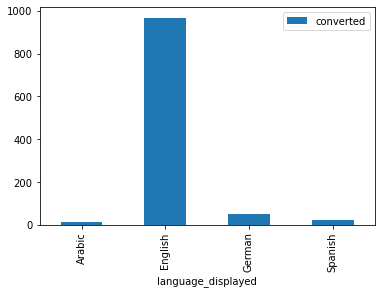

In [582]:
df.groupby('language_displayed')[['converted']].sum().plot.bar()

In [571]:
not_converts = df[df['converted'] == False]
not_converts.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,month_subscribed,day_canceled,dow_canceled,month_canceled,variant_code,mc_code,ld_code,lp_code,lang_match,retention_rct
22,a100000050,2018-01-01,House Ads,personalization,False,English,English,24-30 years,2018-01-02,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,0.425532
24,a100000051,2018-01-01,Push,personalization,False,English,English,30-36 years,2018-01-02,NaT,...,1.0,NaN,NaN,NaN,1,0,2,2,True,1.265823
26,a100000052,2018-01-01,House Ads,personalization,False,English,English,36-45 years,2018-01-02,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,1.315789
28,a100000053,2018-01-01,House Ads,personalization,False,English,English,45-55 years,2018-01-02,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,1.298701
30,a100000054,2018-01-01,House Ads,personalization,False,English,English,55+ years,2018-01-02,NaT,...,1.0,NaN,NaN,NaN,1,3,2,2,True,1.250000


In [578]:
not_subscribers = df[df['date_subscribed'].isna()]
not_subscribers.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,...,month_subscribed,day_canceled,dow_canceled,month_canceled,variant_code,mc_code,ld_code,lp_code,lang_match,retention_rct
1815,a100000004,2018-01-01,House Ads,control,False,English,English,0-18 years,NaT,NaT,...,NaN,NaN,NaN,NaN,0,3,2,2,True,0.505051
1816,a100000013,2018-01-01,Push,control,False,English,English,19-24 years,NaT,NaT,...,NaN,NaN,NaN,NaN,0,0,2,2,True,0.321543
1817,a100000022,2018-01-01,Facebook,control,False,English,English,24-30 years,NaT,NaT,...,NaN,NaN,NaN,NaN,0,2,2,2,True,0.425532
1818,a100000022,2018-01-16,Facebook,control,False,English,English,24-30 years,NaT,NaT,...,NaN,NaN,NaN,NaN,0,2,2,2,True,0.425532
1819,a100000025,2018-01-01,Instagram,control,False,English,English,30-36 years,NaT,NaT,...,NaN,NaN,NaN,NaN,0,4,2,2,True,1.265823


<AxesSubplot:>

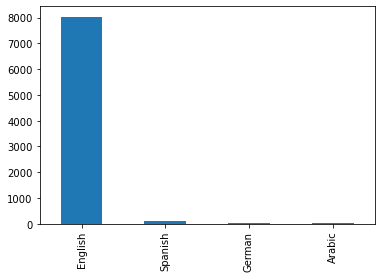

In [580]:
not_subscribers['language_displayed'].value_counts().plot.bar()

<AxesSubplot:>

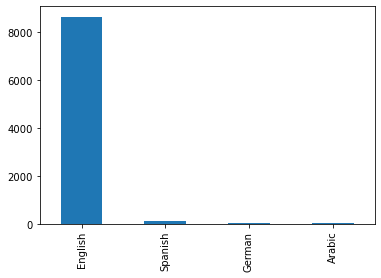

In [581]:
not_converts['language_displayed'].value_counts().plot.bar()

<AxesSubplot:>

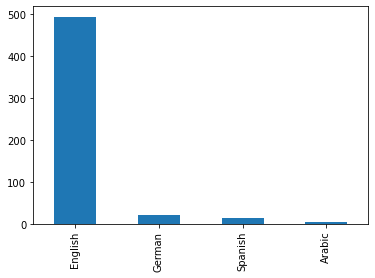

In [583]:
cancelled_df['language_displayed'].value_counts().plot.bar()

<AxesSubplot:>

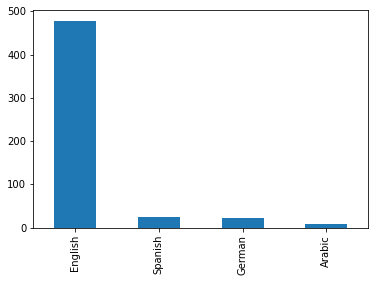

In [585]:
cancelled_df['language_preferred'].value_counts().plot.bar()